In [2]:
import pandas as pd

df = pd.read_csv("./data/edges.csv")
df.head()

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,length,from,to,bridge,access,service,tunnel,width,junction
0,262311709,1625400465,0,24226473,0,2,32;55;493,??????,trunk,60,19.940,1625400465,262311709,NaN,NaN,NaN,NaN,NaN,NaN
1,262311709,262312055,0,24226473,0,2,32;55;493,??????,trunk,60,30.189,262312055,262311709,NaN,NaN,NaN,NaN,NaN,NaN
2,262311709,294071881,0,27989406,0,2,44,??????,primary,60,9.517,294071881,262311709,NaN,NaN,NaN,NaN,NaN,NaN
3,262311709,1924071582,0,27989410,0,2,376,????????,secondary,60,10.554,1924071582,262311709,NaN,NaN,NaN,NaN,NaN,NaN
4,1625400465,1625400459,0,149578829,0,NaN,NaN,NaN,footway,NaN,10.702,1625400459,1625400465,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ndf = df[['u','v','length','lanes']]
ndf.head()

,u,v,length,lanes
0,262311709,1625400465,19.940,2
1,262311709,262312055,30.189,2
2,262311709,294071881,9.517,2
3,262311709,1924071582,10.554,2
4,1625400465,1625400459,10.702,NaN


In [4]:
cdf = ndf.rename(columns={'u':'node1','v':'node2','length':'length','lanes':'width'})
cdf.head()

,node1,node2,length,width
0,262311709,1625400465,19.940,2
1,262311709,262312055,30.189,2
2,262311709,294071881,9.517,2
3,262311709,1924071582,10.554,2
4,1625400465,1625400459,10.702,NaN


In [5]:
cdf.width.fillna(0,inplace=True)
cdf.head()

,node1,node2,length,width
0,262311709,1625400465,19.940,2
1,262311709,262312055,30.189,2
2,262311709,294071881,9.517,2
3,262311709,1924071582,10.554,2
4,1625400465,1625400459,10.702,0


In [6]:
cdf['#number']=cdf.index

In [7]:
cdf.head()

,node1,node2,length,width,#number
0,262311709,1625400465,19.940,2,0
1,262311709,262312055,30.189,2,1
2,262311709,294071881,9.517,2,2
3,262311709,1924071582,10.554,2,3
4,1625400465,1625400459,10.702,0,4


In [8]:
cdf = cdf[['#number','node1','node2','length','width']]
cdf.head()

,#number,node1,node2,length,width
0,0,262311709,1625400465,19.940,2
1,1,262311709,262312055,30.189,2
2,2,262311709,294071881,9.517,2
3,3,262311709,1924071582,10.554,2
4,4,1625400465,1625400459,10.702,0


In [35]:
int(cdf.width[4])

0

In [39]:
for i,j in enumerate(cdf.width):
        try:
                int(j)
        except:
                print(i,int(j[2]))

225 4
233 1
402 1
3142 4
3618 4
3708 1
4903 4
10775 4


In [42]:
cdf['new_width']=[int(i[2]) for i in cdf.width]

IndexError: string index out of range

In [25]:
# cdf = cdf.astype(int)
# cdf.to_csv("./data/linksdb.csv",index=False)


0        2
1        2
2        2
3        2
4        0
        ..
23368    0
23369    0
23370    0
23371    0
23372    0
Name: width, Length: 23373, dtype: object

In [11]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import geopandas as gpd
import pandas as pd
import os

pref = {1: u'北海道', 2: u'青森県', 3: u'岩手県', 4: u'宮城県', 5: u'秋田県',
        6: u'山形県', 7: u'福島県', 8: u'茨城県', 9: u'栃木県', 10: u'群馬県',
        11: u'埼玉県', 12: u'千葉県', 13: u'東京都', 14: u'神奈川県', 15: u'新潟県',
        16: u'富山県', 17: u'石川県', 18: u'福井県', 19: u'山梨県', 20: u'長野県',
        21: u'岐阜県', 22: u'静岡県', 23: u'愛知県', 24: u'三重県', 25: u'滋賀県',
        26: u'京都府', 27: u'大阪府', 28: u'兵庫県', 29: u'奈良県', 30: u'和歌山県',
        31: u'鳥取県', 32: u'島根県', 33: u'岡山県', 34: u'広島県', 35: u'山口県',
        36: u'徳島県', 37: u'香川県', 38: u'愛媛県', 39: u'高知県', 40: u'福岡県',
        41: u'佐賀県', 42: u'長崎県', 43: u'熊本県', 44: u'大分県', 45: u'宮崎県',
        46: u'鹿児島県', 47: u'沖縄県'}
pref_code = 39
rootfolder = "/Users/erick/ReGID Dropbox/zDATA"
# GetAreaCodes
datafolder = u"PAREA_Town_2018/Shape形式/Shape形式/世界測地系"
areafile = f"{pref_code:02d}/A{pref_code:02d}24POL.shp"
path = os.path.join(rootfolder, datafolder, areafile)
area = gpd.read_file(path, encoding='shift_jis')
# GetPopulationData
datafolder = u"PAREA_StatAllforTown_2018/PAREA-Stat.Population"
headerfile = u"ヘッダーファイル/JC0401S0000.csv"
popfile = f"data/{pref_code:02d}/S{pref_code:02d}4JC0401S0000.csv"
pathfile = os.path.join(rootfolder, datafolder, popfile)
pathheader = os.path.join(rootfolder, datafolder, headerfile) 
pop_h = pd.read_csv(pathheader)
pop = pd.read_csv(pathfile, names=pop_h.columns)
colnames={'行政コード':"Val_GovCod", '図形有無F':"FigureF", '分割合算F':"DivRatioF", '秘匿処理F':"ConcealF", 'リザーブ1':"Reserve1", 'リザーブ2':"Reserve2", '指標数':"NoIndicators", '総数(人口)':"TotalPop",'男(人口)':"Male", '女(人口)':"Female", '世帯数':"NoHouseholds", '面積(Ｋ㎡)':"AreaKm2", '人口密度(Ｋ㎡あたり人口)':"PopDensity"}
pop.rename(columns=colnames,inplace=True)
data = pd.merge(pop, area, on="Val_GovCod")
gdata = gpd.GeoDataFrame(data, geometry= data['geometry'], crs="EPSG:4326")

In [12]:
gdata.head()

,Val_GovCod,FigureF,DivRatioF,ConcealF,Reserve1,Reserve2,NoIndicators,TotalPop,Male,Female,NoHouseholds,AreaKm2,PopDensity,All_text,Parcel,geometry
0,39201001000,0,0,0,NaN,NaN,6,327,151,176,125,0.045,7266.67,高知県-高知市--相生町-,None,"POLYGON ((133.54738 33.56493, 133.54708 33.563..."
1,39201002000,0,0,0,NaN,NaN,6,881,416,465,438,0.167,5275.45,高知県-高知市--青柳町-,None,"POLYGON ((133.56388 33.55663, 133.56398 33.556..."
2,39201003000,0,0,0,NaN,NaN,6,239,93,146,129,0.039,6128.21,高知県-高知市--赤石町-,None,"POLYGON ((133.51238 33.55663, 133.51188 33.556..."
3,39201004001,0,0,0,NaN,NaN,6,1581,696,885,852,0.201,7865.67,高知県-高知市--曙町-１丁目,１丁目,"POLYGON ((133.49448 33.54793, 133.49378 33.549..."
4,39201004002,0,0,0,NaN,NaN,6,107,45,62,69,0.165,648.48,高知県-高知市--曙町-２丁目,２丁目,"POLYGON ((133.48948 33.54803, 133.48438 33.547..."


In [13]:
gdata.to_crs(6690,inplace=True)

In [14]:
gdata.crs

<Projected CRS: EPSG:6690>
Name: JGD2011 / UTM zone 53N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Japan - 132°E to 138°E
- bounds: (132.0, 17.09, 138.0, 43.55)
Coordinate Operation:
- name: UTM zone 53N
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
import geopandas as gpd
import os

gdf = gpd.read_file('../pre/AOS/aos.shp')
gdf.to_crs(6690,inplace=True)
gdf.crs
# gdf_int = gpd.overlay(gdata,gdf,how='intersection')
# ax = gdf_int.plot()
# gdf.plot(ax=ax,facecolor='none',edgecolor='red')

<Projected CRS: EPSG:6690>
Name: JGD2011 / UTM zone 53N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 53N
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:6690
Right CRS: EPSG:6690

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

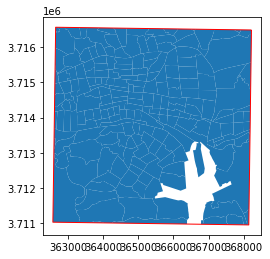

In [16]:
gdf_int = gpd.overlay(gdata,gdf,how='intersection')
ax = gdf_int.plot()
gdf.plot(ax=ax,facecolor='none',edgecolor='red')